# Exploratory Data Analysis (EDA)

## Setting Up (Imports)

In [16]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style="whitegrid")  # Seaborn
pd.set_option('display.max_columns', None) # pandas

## Loading the data

Since I'll be working on Churn prediction, I chose to work with data from Kaggle, namely the "Telco Customer Churn dataset" from IBM.    
It's widely used in real churn prediction workflows and balances size with complexity.

In [17]:
# This time I load a dataset directly from github
url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
df.head() # Quick look at the dataset

Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


_Dataset has ~7000 rows and 21 features, perfect for this project._

In [18]:
# Quick check on missing values + feature types
missing = df.isnull().sum()

print("Missing values per column with data types:")
for col in df.columns:
    print(f"{col:20} | Missing: {missing[col]:5} | Type: {df[col].dtype}")


Missing values per column with data types:
customerID           | Missing:     0 | Type: object
gender               | Missing:     0 | Type: object
SeniorCitizen        | Missing:     0 | Type: int64
Partner              | Missing:     0 | Type: object
Dependents           | Missing:     0 | Type: object
tenure               | Missing:     0 | Type: int64
PhoneService         | Missing:     0 | Type: object
MultipleLines        | Missing:     0 | Type: object
InternetService      | Missing:     0 | Type: object
OnlineSecurity       | Missing:     0 | Type: object
OnlineBackup         | Missing:     0 | Type: object
DeviceProtection     | Missing:     0 | Type: object
TechSupport          | Missing:     0 | Type: object
StreamingTV          | Missing:     0 | Type: object
StreamingMovies      | Missing:     0 | Type: object
Contract             | Missing:     0 | Type: object
PaperlessBilling     | Missing:     0 | Type: object
PaymentMethod        | Missing:     0 | Type: object
Month

_Some notes: `SeniorCitizen` is not boolean, its int64, and the `TotalCharges` is of the type Object_

## Target Variable Exploration

Churn is the TARGET    
In this step we check the Class imbalance to get a picture of what metrics to focus on...



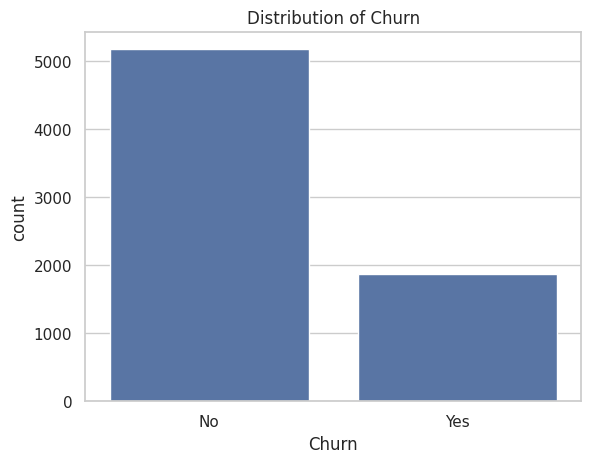

Churn distribution (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [19]:
# Target distribution
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

# Percentage
churn_percent = df['Churn'].value_counts(normalize=True) * 100
print("Churn distribution (%):")
print(churn_percent)


If we have a lazy model predicting “No churn” every time, the accuracy would be 73%. Therefore, relying on accuracy alone is not a good strategy. Due to the class imbalance and the high cost of false negatives in churn prediction, recall and F1-score are more informative metrics than accuracy.

Recall is used to answer: “Out of all customers who actually churned, how many did we detect?” This metric focuses on reality.
Precision is used to answer: “Of all customers predicted to churn, how many actually did churn?” This metric focuses on predictions.

Accuracy becomes more meaningful only when the classes are balanced.
In this project, companies are less concerned about customers who stay and more concerned about predicting which customers will churn, as this informs retention strategies.

In this project, **false negatives** (Model predicts "customer will stay", but they actually churn.) are **most expensive**, so we must aim for a high recall.

## Categorical vs Numerical Features

_This step shows us what features needs handling (encoding, scaling, converting, ...)_

In [20]:
# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist() #Objects
numerical_features = df.select_dtypes(include=['int64','float64']).columns.tolist() # ints or floats

# Remove target from categorical
categorical_features.remove('Churn') # Prevent data leakage

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)


Categorical features: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']
Numerical features: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


We handle these in the preprocessing step:
- `CustomerID` is useless, its just an identifier. We will drop it
- `SeniorCitizen` is not boolean, its int64
- `TotalCharges` is of the type Object, thats why its considered categorical

## Basic Visualization

_Some simple visuals to help us explore the data more_

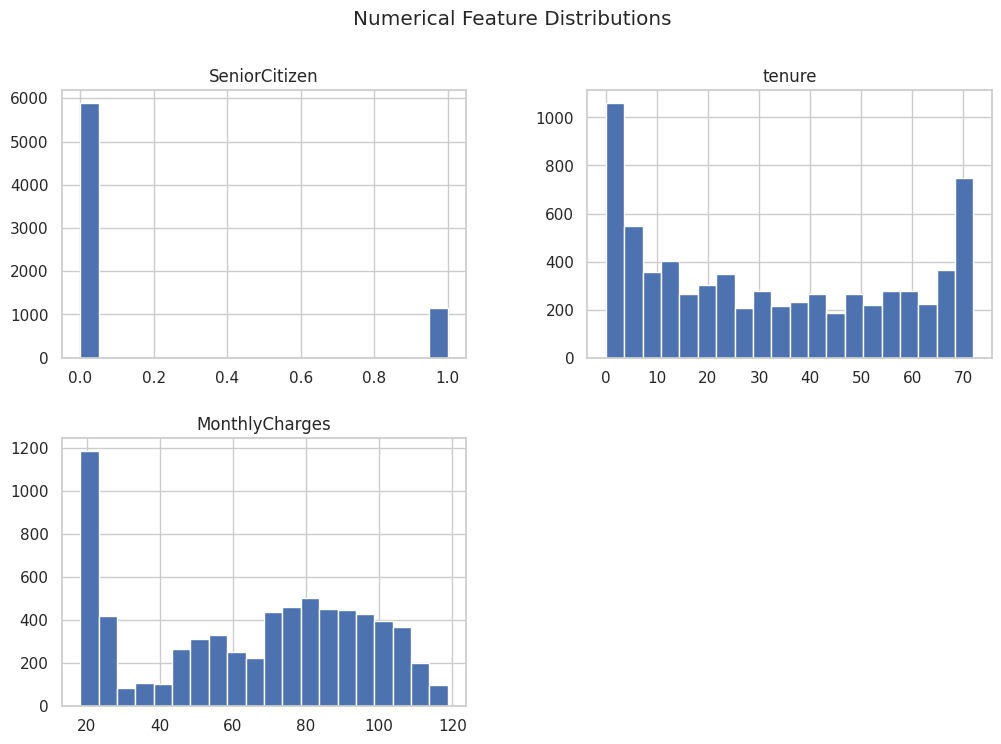

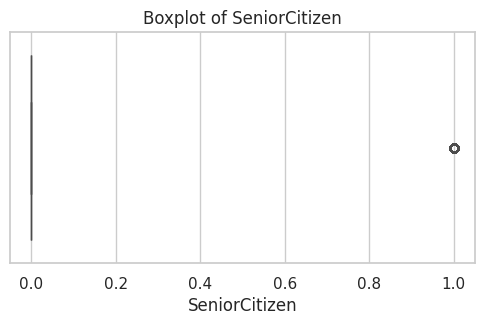

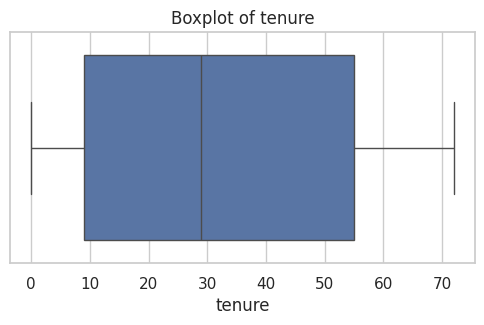

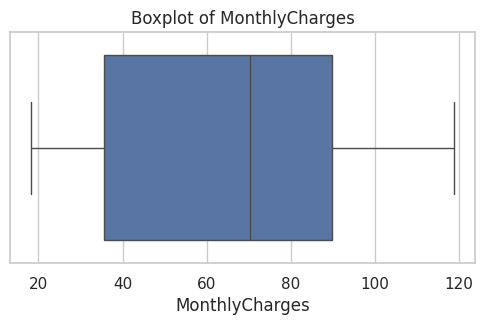

In [21]:
# Histograms
df[numerical_features].hist(bins=20, figsize=(12,8))
plt.suptitle("Numerical Feature Distributions")
plt.show()

# Boxplots for outliers
for col in numerical_features:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


_Some notes: for the MonthlyCharges, most values are in the 20, so we will need scaling_